In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataframe = pd.read_csv(r"indicadores_H5W1_sentencebert2_CLASS.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,CLASS
0,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000,entailment
1,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488,entailment
2,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000,contradiction
3,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000,contradiction
4,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000,neutral
...,...,...,...,...,...,...,...,...
95,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000,entailment
96,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000,entailment
97,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000,contradiction
98,0.655674,1.000000,1.0,0.357686,1.0,1.0,1.000000,contradiction


In [3]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.712144,0.773416,0.972706,0.496864,0.951210,0.884602,0.918129
std,0.254961,0.329373,0.137323,0.327958,0.190396,0.286908,0.239915
min,0.072305,0.076060,0.189548,-0.011613,-0.004532,0.026425,-0.013459
25%,0.532159,0.492926,1.000000,0.216580,1.000000,1.000000,1.000000
50%,0.751170,1.000000,1.000000,0.456016,1.000000,1.000000,1.000000
75%,0.986195,1.000000,1.000000,0.807518,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


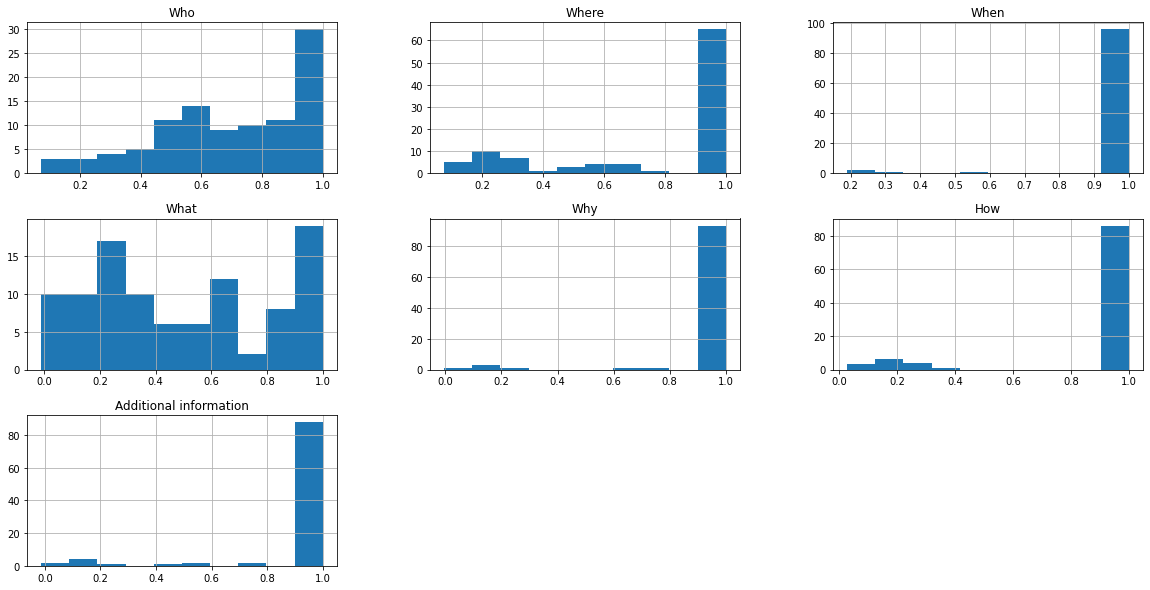

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

/home/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


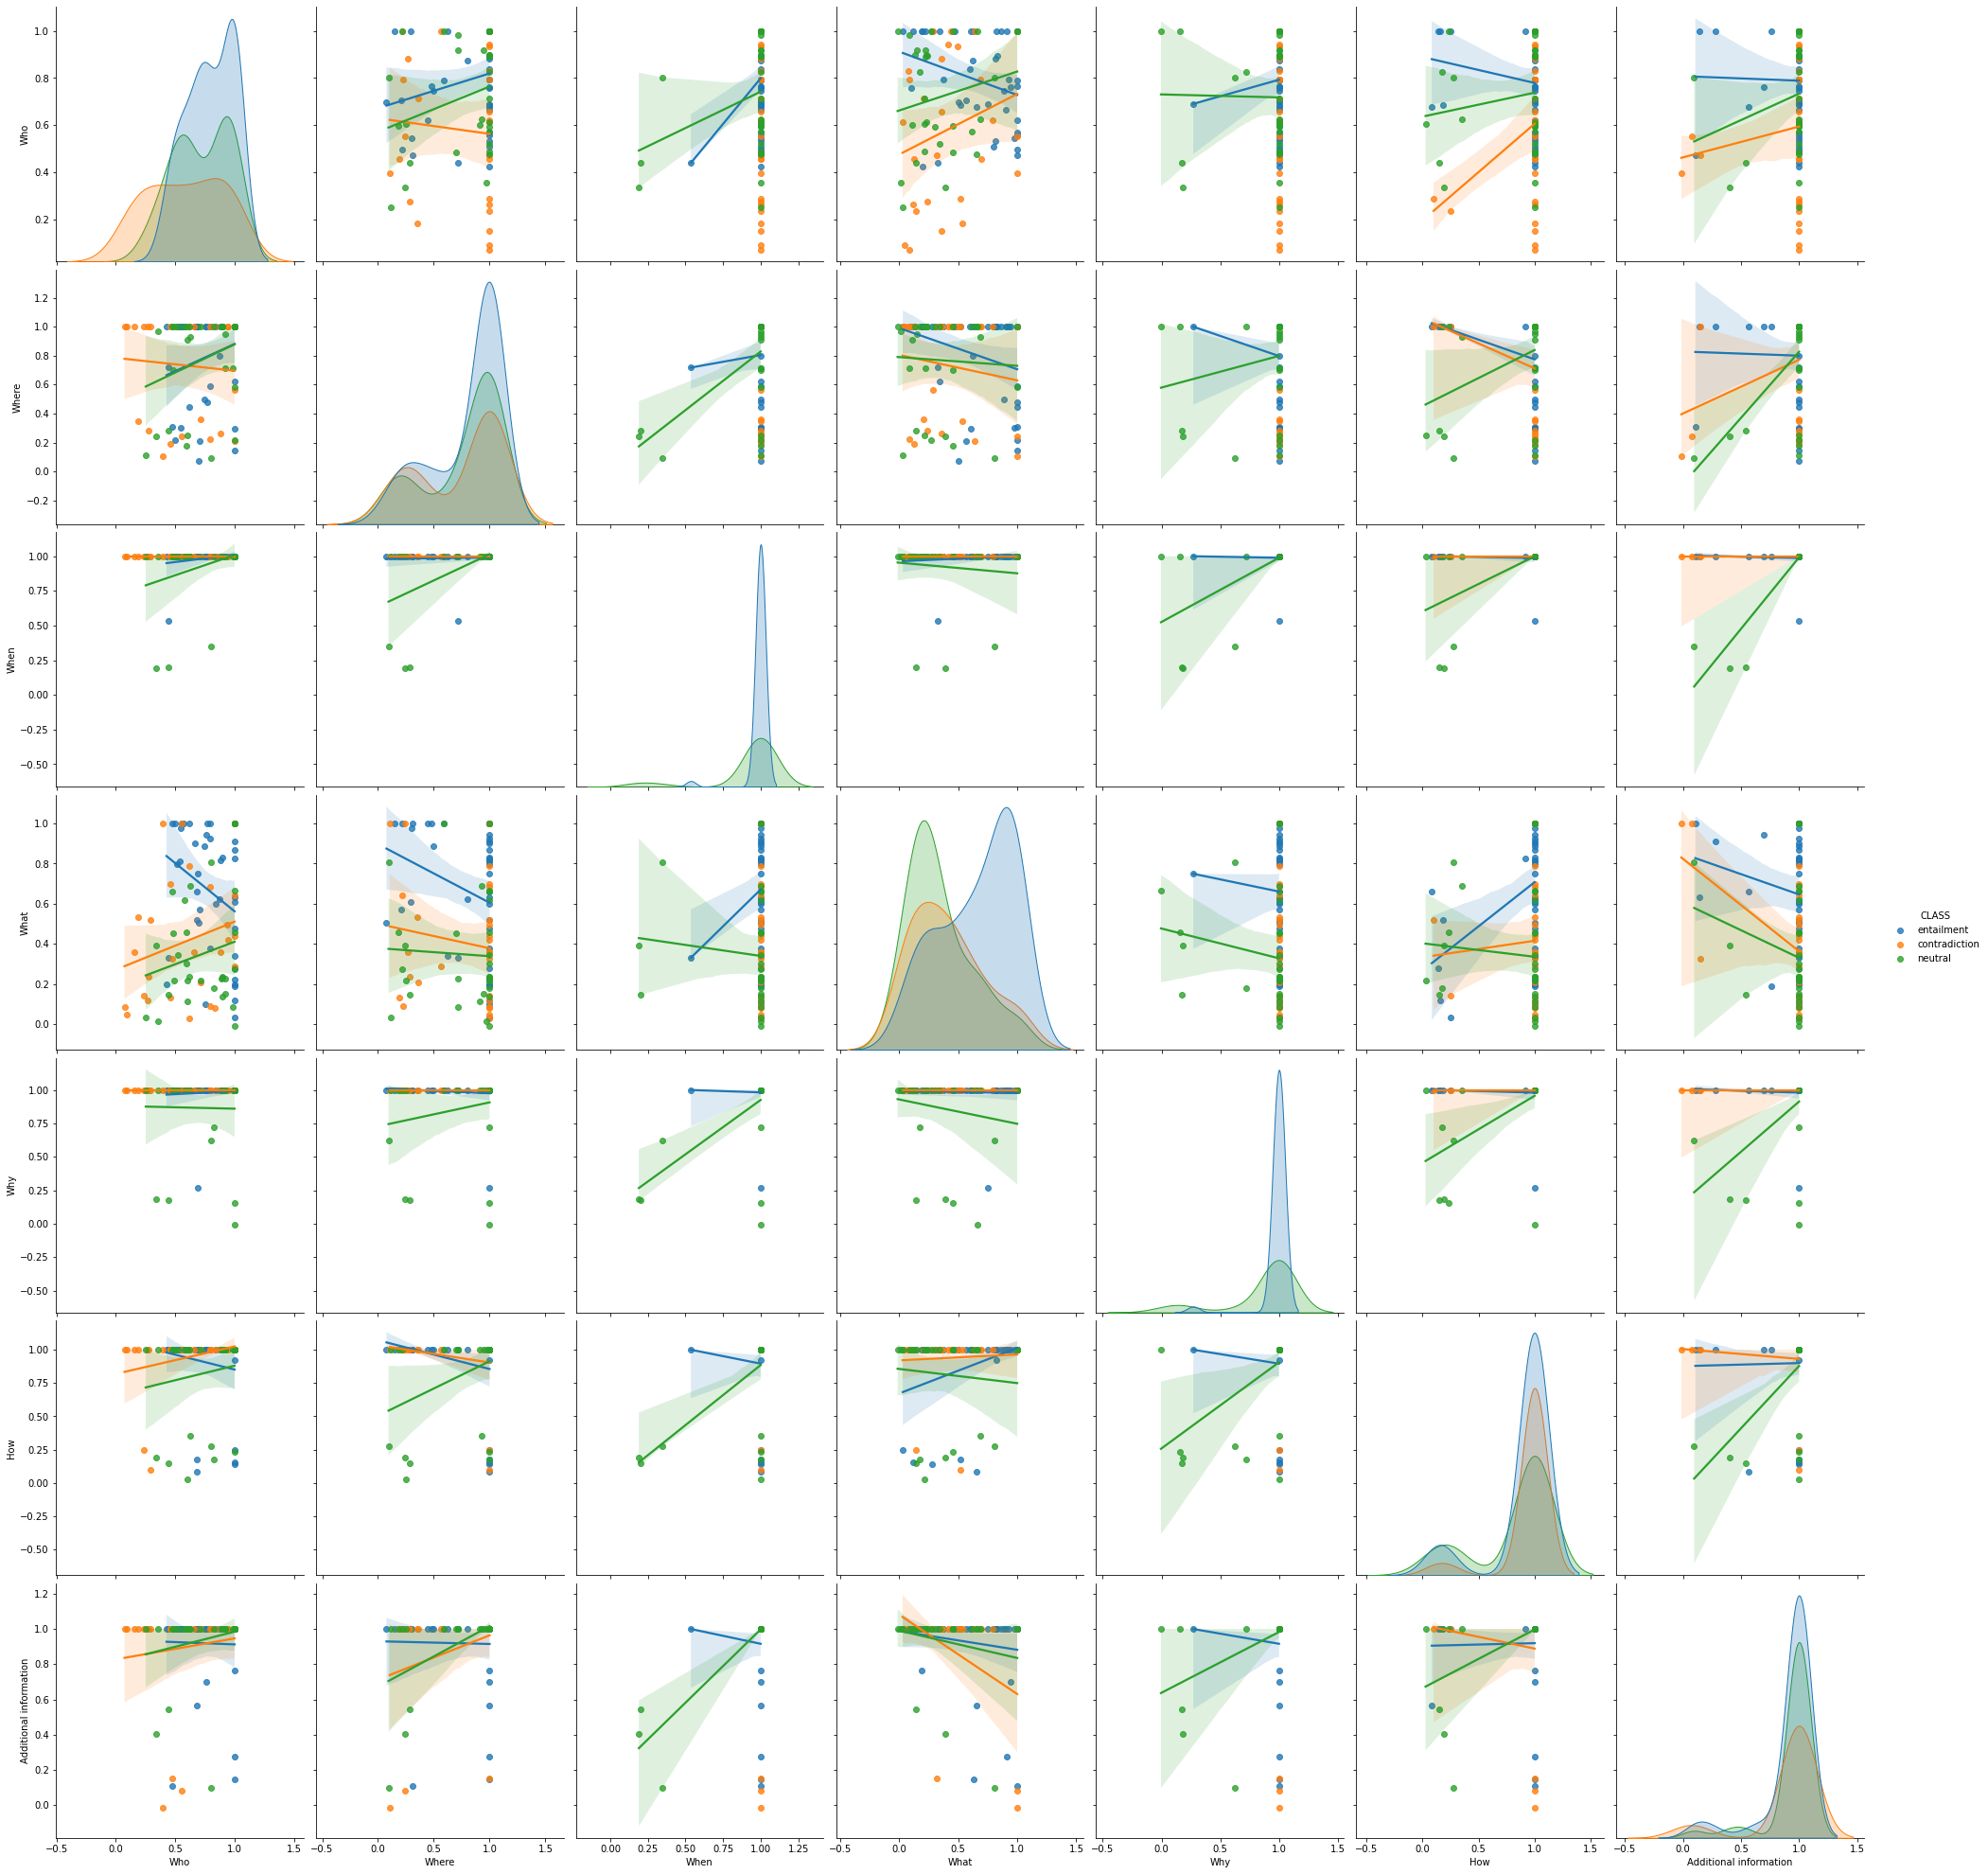

In [6]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [7]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_162788/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_162788/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 7)

In [8]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [9]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [11]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
model.decision_function(X)

array([[-0.11398987,  0.18916943, -0.07517956],
       [-0.26450227,  0.50799264, -0.24349038],
       [-0.15809726,  0.18132214, -0.02322488],
       [-0.00758651,  0.06793424, -0.06034772],
       [-0.18274573,  0.16593287,  0.01681286],
       [-0.00495104, -0.05658655,  0.06153759],
       [-0.27429193,  0.33977132, -0.06547938],
       [-0.34387026,  0.23292236,  0.1109479 ],
       [-0.17312768,  0.30311073, -0.12998305],
       [-0.28873351,  0.27408097,  0.01465254],
       [-0.18891673,  0.09524946,  0.09366727],
       [-0.18369171,  0.17307168,  0.01062003],
       [-0.24710681,  0.46676813, -0.21966132],
       [-0.08771174, -0.02535214,  0.11306389],
       [-0.22371397, -0.17427486,  0.39798883],
       [-0.1892453 ,  0.15183496,  0.03741034],
       [-0.24775678,  0.40526004, -0.15750326],
       [-0.2037954 ,  0.20245478,  0.00134062],
       [-0.21512867,  0.39924435, -0.18411568],
       [-0.31111078,  0.31640714, -0.00529636],
       [-0.29052291,  0.51773086, -0.227

In [13]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information'])

In [14]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [15]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [16]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  5 How 0 Who
Entailment  3 What 5 How
Neutral  6 Additional information 3 What


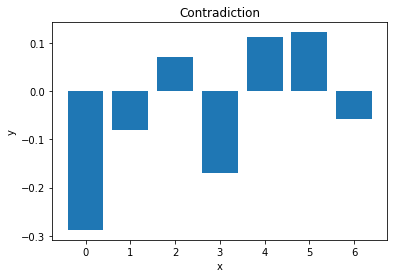

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,7,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

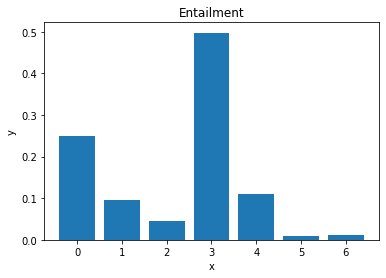

In [18]:
x_v = np.arange(0,7,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

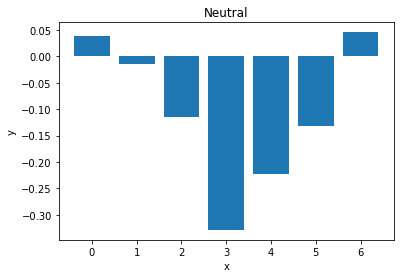

In [19]:
x_v = np.arange(0,7,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [20]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment

In [21]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [22]:
X

array([[ 0.69678319,  0.07606002,  1.        ,  0.5052616 ,  1.        ,
         1.        ,  1.        ],
       [ 0.76258194,  1.        ,  1.        ,  0.94416082,  1.        ,
         1.        ,  0.69948828],
       [ 0.88135701,  0.26540819,  1.        ,  0.36080334,  1.        ,
         1.        ,  1.        ],
       [ 0.15336631,  1.        ,  1.        ,  0.35831603,  1.        ,
         1.        ,  1.        ],
       [ 0.91990316,  0.71598363,  1.        ,  0.22467875,  1.        ,
         1.        ,  1.        ],
       [ 0.35554153,  0.97049403,  1.        ,  0.01238695,  1.        ,
         1.        ,  1.        ],
       [ 0.62731695,  0.93157697,  1.        ,  0.69085991,  1.        ,
         0.35085422,  1.        ],
       [ 1.00000024,  1.00000012,  1.        ,  0.27992404,  1.        ,
         0.13744932,  1.        ],
       [ 0.57502526,  1.        ,  1.        ,  0.61912513,  1.        ,
         1.        ,  1.        ],
       [ 0.68481946,  1.    

In [23]:
model.score(X,y)

0.48

In [24]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [25]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.466667 (0.177778)


In [26]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [27]:
print(confusion_matrix(Y_validation, predictions))

[[0 2 0]
 [0 3 0]
 [0 3 2]]


In [28]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         2
   entailment       0.38      1.00      0.55         3
      neutral       1.00      0.40      0.57         5

     accuracy                           0.50        10
    macro avg       0.46      0.47      0.37        10
 weighted avg       0.61      0.50      0.45        10



/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
